In [1]:
print("Extract Image With OCR")

Extract Image With OCR


In [2]:
# Import library yg dibutuhkan
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
from matplotlib import pyplot as plt
import os
from glob import glob
from tqdm import tqdm

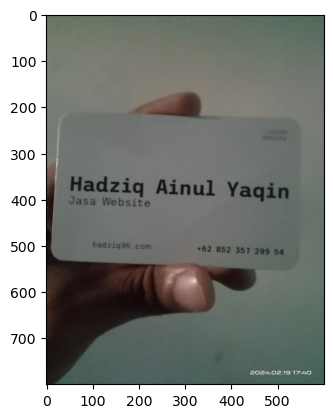

i

Hadziq Ainul Yaqin

Jasa Website

hadz1q96. com

+62 852 357 299 54




In [3]:
img_cv = cv2.imread('../dataset/card/card3.jpeg')

plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.show()

text_cv = pytesseract.image_to_string(img_cv)
print(text_cv)

In [4]:
import os

# Path ke direktori yang berisi file-file yang akan diubah nama
directory = '../dataset/card/'
files = os.listdir(directory)
files.sort()
prefix = 'card'

for idx, filename in enumerate(files):
    # Mendapatkan ekstensi file
    ext = os.path.splitext(filename)[1]
    # Memastikan format file adalah jpeg
    if ext.lower() != '.jpeg':
        ext = '.jpeg'
    # Membuat nama baru dengan prefix dan nomor urut
    new_filename = f'{prefix}{idx+1}{ext}'
    # Ubah nama file dengan menggunakan fungsi os.rename
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
    print(f'Renamed {filename} to {new_filename}')

Renamed card1.jpeg to card1.jpeg
Renamed card10.jpeg to card2.jpeg
Renamed card11.jpeg to card3.jpeg
Renamed card12.jpeg to card4.jpeg
Renamed card13.jpeg to card5.jpeg
Renamed card14.jpeg to card6.jpeg
Renamed card15.jpeg to card7.jpeg
Renamed card16.jpeg to card8.jpeg
Renamed card17.jpeg to card9.jpeg
Renamed card18.jpeg to card10.jpeg
Renamed card19.jpeg to card11.jpeg
Renamed card2.jpeg to card12.jpeg
Renamed card20.jpeg to card13.jpeg
Renamed card21.jpeg to card14.jpeg
Renamed card22.jpeg to card15.jpeg
Renamed card23.jpeg to card16.jpeg
Renamed card24.jpeg to card17.jpeg
Renamed card25.jpeg to card18.jpeg
Renamed card26.jpeg to card19.jpeg
Renamed card27.jpeg to card20.jpeg
Renamed card28.jpeg to card21.jpeg
Renamed card29.jpeg to card22.jpeg
Renamed card3.jpeg to card23.jpeg
Renamed card30.jpeg to card24.jpeg
Renamed card31.jpeg to card25.jpeg
Renamed card32.jpeg to card26.jpeg
Renamed card33.jpeg to card27.jpeg
Renamed card34.jpeg to card28.jpeg
Renamed card35.jpeg to card29.jp

In [5]:
listOfImg = [os.path.join(directory, filename) for filename in os.listdir(directory)]

In [6]:
listOfData = pd.DataFrame(columns=['id','text'])

In [7]:
# Inisialisasi list untuk menyimpan hasil ekstraksi data dari setiap gambar
listOfData = pd.DataFrame(columns=['id','text'])

# Loop melalui setiap gambar dalam direktori
for img_path in tqdm(listOfImg, desc='dataset_raw'):
    _, filename = os.path.split(img_path)
    # Baca gambar menggunakan OpenCV
    image = cv2.imread(img_path)
    # Pastikan gambar terbaca dengan benar
    if image is not None:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        data = pytesseract.image_to_data(gray)
        # print(data)
        
        text_cv = pytesseract.image_to_string(gray)
        print(text_cv)
        
        dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
        df = pd.DataFrame(dataList[1:],columns=dataList[0])
        df.dropna(inplace=True)
        df['conf'] = df['conf'].astype(float) 
        df['conf'] = df['conf'].astype(np.int32)

        useFulData = df.query('conf >= 30')

        # Dataframe
        DataOfCard = pd.DataFrame()
        DataOfCard['text'] = useFulData['text']
        DataOfCard['id'] = filename

        # concatenation
        listOfData = pd.concat((listOfData,DataOfCard))
    else:
        print(f'Failed to read image: {filename}')

dataset_raw:   1%|█▏                                                                                                               | 1/91 [00:00<00:31,  2.89it/s]

f eat

Muflih Fathoniawan

Trainer, Conch, Career Consultant




dataset_raw:   2%|██▍                                                                                                              | 2/91 [00:00<00:32,  2.76it/s]

Olivia Wilson

Kepala Divisi Pemasaran

& 123-456-7890 i hello@reallygreatsite.com

reallygreatsite.com




dataset_raw:   3%|███▋                                                                                                             | 3/91 [00:01<00:35,  2.48it/s]

Chief Executive Officer

RIVALDO SANTOS

tivaldo.sontoso@thelazy.media | +62 877-8630-1551



dataset_raw:   4%|████▉                                                                                                            | 4/91 [00:01<00:33,  2.61it/s]

Rian Anugrah

Fotografer
@ 423-456-7890
© hello@reallygreatsite.com

123 Anywhere St,
Any City, ST 12345



dataset_raw:   5%|██████▏                                                                                                          | 5/91 [00:01<00:33,  2.59it/s]

Estelle Darey VY /

A

@ +123-456-7890
@ wwwreallygreatsité.com
@ 123 Anywhere St, Any City




dataset_raw:   7%|███████▍                                                                                                         | 6/91 [00:02<00:33,  2.56it/s]

ALBERT SIANTURI, S.H., C.LL




dataset_raw:   8%|████████▋                                                                                                        | 7/91 [00:02<00:31,  2.66it/s]

TAKEHIRO KANEGI

Manajer Umum

123-456-7890

INGOUDE
COMPANY




dataset_raw:   9%|█████████▉                                                                                                       | 8/91 [00:03<00:32,  2.56it/s]

Cynthia Dewi

lead of Funding

& 0877-8071-9379

% Graha Kapital 1, Ground Floor
JI. Kemang Raya No. 4, Bangka
Jakarta Selatan 12730 bprdigis.com




dataset_raw:  10%|███████████▏                                                                                                     | 9/91 [00:03<00:29,  2.78it/s]

Cahaya Dewi

Situs: www.reallygreatsite.com
Telpon : 123-456-7890



dataset_raw:  11%|████████████▎                                                                                                   | 10/91 [00:03<00:31,  2.55it/s]

Saung Tekwan

by Ibu Nety H.

“saung Tekwan

by Ibu Nety H.

(.0812-9854-1865

ana Paee

2019/4/10 21:23



dataset_raw:  12%|█████████████▌                                                                                                  | 11/91 [00:04<00:30,  2.59it/s]

Morgan Ahmad

Desainer Grafis

© +123-456-7890
= hello@reallygreatsite.com
% 123 Anywhere St., Any City




dataset_raw:  13%|██████████████▊                                                                                                 | 12/91 [00:04<00:33,  2.33it/s]

Fitri P
A
@ 08389:
BIMBAM SNACK
he & Co f

Fitri Puspitasari
Owner

@ 083892117589

BIMBAM SNACK

Snack box, Cake & Cookies

@ Fitripso
® x




dataset_raw:  14%|████████████████                                                                                                | 13/91 [00:05<00:31,  2.47it/s]

PT. ANEKA POMPA SOLUSINDO. i

AGUS FERIYANTO.
‘Sales Engi

DB 0813-1805-6969




dataset_raw:  15%|█████████████████▏                                                                                              | 14/91 [00:05<00:29,  2.58it/s]

PE.KARVA ADYA PUTRA

ArsiteKtur - Landscape - Sipil - Kontraktor

SULISTIY




dataset_raw:  16%|██████████████████▍                                                                                             | 15/91 [00:05<00:31,  2.41it/s]

“0,
»

PT SIMBIOTIK MULTI TALENTA INDONESIA ol

&smx Be ;

Ove
Yohannes Purnomo

@ cvesctvegmea.com



dataset_raw:  18%|███████████████████▋                                                                                            | 16/91 [00:06<00:34,  2.21it/s]

Made with Love = eceveri

Hand

— = emma Windawant

¢ BeEmmass0s

7] Booz 04848479

= em Emma Windawanti

(@emmasa03
B) 0812-8484-8479




dataset_raw:  19%|████████████████████▉                                                                                           | 17/91 [00:06<00:31,  2.31it/s]

SPG6L-L¥66-ZLSO

? aa rd)
7 YAVE INVNid td)




dataset_raw:  20%|██████████████████████▏                                                                                         | 18/91 [00:07<00:32,  2.24it/s]

Rumah sakit

Borcelle

DOKTER SPESIALIS KANDUNGAN

DR. RUFUS STEWART
Spesialis Kandungan

@ +123-456-7890

@ hello@reallygreatsite.com
@ 123 Anywhere St., Any City
@ www.eallygreatsite.com



dataset_raw:  21%|███████████████████████▍                                                                                        | 19/91 [00:07<00:30,  2.38it/s]

dataset_raw:  22%|████████████████████████▌                                                                                       | 20/91 [00:08<00:32,  2.18it/s]

Marzuki REINA

Manajer Umum

\ / © 123-456-7890
(1) hello@reallygreatsite

% @ www-reallygreatsite.com

\ \.@ 123 Anywhere St. Any City, ST 12345

\




dataset_raw:  23%|█████████████████████████▊                                                                                      | 21/91 [00:08<00:28,  2.42it/s]

ge & ee
“Om @ © oatect shop
dalee | ©@ tateet shoo




dataset_raw:  24%|███████████████████████████                                                                                     | 22/91 [00:08<00:28,  2.40it/s]

KETUT SUSILO

PENGELOLA KEUANGAN

123-456-7890 @
www.reallygreatsite.com ©
123 Anywhere St, Any City @




dataset_raw:  25%|████████████████████████████▎                                                                                   | 23/91 [00:09<00:27,  2.50it/s]

hello@reallygreatsite.comr

(123-456-7890

© 23 Anywhere st., Any City wywareallygreatsitecSm-



dataset_raw:  26%|█████████████████████████████▌                                                                                  | 24/91 [00:09<00:30,  2.19it/s]

Alanz sn

Daniel Eka Saputra
Business Partner

Member since May 2022

‘ACHIEVE STRONG

Kantor Pemasaran

Vision

Grand Slipi Tower Lt.26,

JL. S Parman, Kav 22-24, Palmerah
Jakarta Barat, 11480

HP/WA_ : 0816 1335 616

0812 1348 8838
IG : @daniel.asn.lifechanger
Email _: daniel77.vision@gmail.com
wwwaallianz.co.id



dataset_raw:  27%|██████████████████████████████▊                                                                                 | 25/91 [00:10<00:29,  2.20it/s]

DANIEL GALLEGO

DESAINER GRAFIS.

@ 123-456-7890

© hello@reallygreatsite.com BORCELLE
www.reallygreatsite.com




dataset_raw:  29%|████████████████████████████████                                                                                | 26/91 [00:11<00:38,  1.70it/s]

GADING SATRIA NAINGGOLAN, S.H

Cc +62 811933101 ©
GADIN o:.CO, gsn@gadingco.com

office@gadingco.com

oR fe www.gadingco.com ©
3 ah a

i ti Naga Mas
T <2nd Floor, Suite 212, Duta Mas Fa
Blok Al No.14-16, Cipete Utara, Keb;
Jakarta Setatan, DK! J:




dataset_raw:  30%|█████████████████████████████████▏                                                                              | 27/91 [00:11<00:32,  2.00it/s]

ALBERT SIANTURL, S.H., CLI

0812 6300 0043,
‘shaw albert@emai.com

J}. Waringin No. 16
Banguntapan, Bantal




dataset_raw:  31%|██████████████████████████████████▍                                                                             | 28/91 [00:11<00:27,  2.27it/s]

dataset_raw:  32%|███████████████████████████████████▋                                                                            | 29/91 [00:12<00:26,  2.37it/s]

@ on13 214 0700
© eatiotomort
B 80a: 4721264501

© 2 alimantan, Nusa Loka,
Mekar Jaya, Kec. Serpong,
Tangerang Selatan




dataset_raw:  33%|████████████████████████████████████▉                                                                           | 30/91 [00:12<00:27,  2.26it/s]

Azizah Utami

Manager

+123-456-7890 @

hello@reallygreatsite.com ©
123 Anywhere St., Any City @

www.reallygreatsite.com ©




dataset_raw:  34%|██████████████████████████████████████▏                                                                         | 31/91 [00:13<00:27,  2.15it/s]

Martin Al fasha

© +6282216548544
BA rasyaschannel@gmail.com

MITSUBISHI Marteen_mitsubishijkt
MOTORS

9 Jakarta Selatan




dataset_raw:  35%|███████████████████████████████████████▍                                                                        | 32/91 [00:13<00:29,  2.01it/s]

REVENA PRATIWI UTAMI
Direktur

021-84301175 | 0877-7771-1511

© info@anbiyatourtravel.com

© anbiyatourtravel.com

@ Ruko Krangean, Permai Blok RT16 No. 23
JL Transyogi Cibubur- Kota Bekasi




dataset_raw:  36%|████████████████████████████████████████▌                                                                       | 33/91 [00:14<00:26,  2.19it/s]

dataset_raw:  37%|█████████████████████████████████████████▊                                                                      | 34/91 [00:14<00:25,  2.24it/s]

CHIAKI SATC

PENGACARA
@ 123-456-7890

© wowreallygreatsite.com BORGHLIE

© 123 Anywhere st, Any City




dataset_raw:  38%|███████████████████████████████████████████                                                                     | 35/91 [00:15<00:25,  2.23it/s]

Hetut Susilo

MIE GORENG Pimpinan dan C60

PAK KETUT

A: 23 Anywhere St, Any City, ST 12345
E:  wwwreallygreatsite.com

T: 123-456-7890




dataset_raw:  40%|████████████████████████████████████████████▎                                                                   | 36/91 [00:15<00:26,  2.11it/s]

Personal Office Desk Set

Custom Metal and Wood Products
Design and Build Workshop

P.0.0.S Budi

0895 3414 82507

© @pods.workshop <5] @pods-workshop M9 pods.workshop@gmail.com

Office: | Workshop:
Sentraland Boulevard Blok H7 No. 8 | J. Wijaya Kusuma V No. 10
Parung Panjang, Bogor 16360 | Parung Panjang, Bogor 16360
+62 852 1790 1515




dataset_raw:  41%|█████████████████████████████████████████████▌                                                                  | 37/91 [00:15<00:24,  2.24it/s]

HAIKAL RAFDI
DOKTER

@ 123-456-7890
(as) hello@reallygreatsite.com
© 123 Anywhere st., Any City

© wwweeallygreatsite.com




dataset_raw:  42%|██████████████████████████████████████████████▊                                                                 | 38/91 [00:16<00:22,  2.36it/s]

DANIEL GALLEGO

Manajer Pemasaran

& 123-456-7890
= hello@reallygreatsite.com
® www.reallygreatsite.com

Salford & Co.



dataset_raw:  43%|████████████████████████████████████████████████                                                                | 39/91 [00:16<00:23,  2.18it/s]

GARRY ADRIAN PUTRA

DIREKTUR

| % +62 878 46437055

ie garryadrianp@gmail.com

| digimark93generation@gmail
Jalan Camat Gabun 1 No.11

{2 R007 Rw.08 Lenteng Agung
Jakarta 12630




dataset_raw:  44%|█████████████████████████████████████████████████▏                                                              | 40/91 [00:17<00:22,  2.26it/s]

Raya Naroporeg O42
Cheung! Bower 16820

0838-9090-9067

0851-5888-9067

busa_cileungsi




dataset_raw:  45%|██████████████████████████████████████████████████▍                                                             | 41/91 [00:17<00:19,  2.56it/s]

dataset_raw:  46%|███████████████████████████████████████████████████▋                                                            | 42/91 [00:18<00:21,  2.28it/s]

Mariana Anderson
Desainer

+123-456-7890
+123-456-7890

www.reallygreatsite.com Liceria & Co.
hello@reallygreatsite.com Real Estate

123 Anywhere St., Any
City, ST 12345




dataset_raw:  47%|████████████████████████████████████████████████████▉                                                           | 43/91 [00:18<00:19,  2.51it/s]

YOESOEP wipopg

© 0812 2825 7575

Darmokali No 26

Surabaya




dataset_raw:  48%|██████████████████████████████████████████████████████▏                                                         | 44/91 [00:18<00:17,  2.64it/s]

Itsuki
Takahashi

Manajer Umum
Eq reticereatiygreatsitecom
[LD zs anywhere st, any city
www.reallygreatsite.com
125-456-7890



dataset_raw:  49%|███████████████████████████████████████████████████████▍                                                        | 45/91 [00:19<00:17,  2.66it/s]

fat Kesehatan

Blok no. BS RI/RW
Outer Ring Road,
arta Barat 11730




dataset_raw:  51%|████████████████████████████████████████████████████████▌                                                       | 46/91 [00:19<00:18,  2.37it/s]

PHYLLIS SCHWAIGER
MANAJER BISNIS SAteoRE eee

& 123-456-7890
&% hello@reallygreatsite.com
@ www.reallygreatsite.com
@ 123 Anywhere St., Any City, ST 12345




dataset_raw:  52%|█████████████████████████████████████████████████████████▊                                                      | 47/91 [00:20<00:19,  2.21it/s]

(© 085 298 987 708

@}) Ardyma Parfum Ardyma

JI, Cumi-cumi No.42,
Malimongan Baru, Makassar

. «
14)” «ea




dataset_raw:  53%|███████████████████████████████████████████████████████████                                                     | 48/91 [00:20<00:18,  2.26it/s]

battery

@ 081382140730
@eakoromort |
# 2ca: 4751264501

© JL Ketimantan, Nusa Loke, |
Mekar Jaya, Kee. Serpong,
Tengerang Selatan

Rahardian




dataset_raw:  54%|████████████████████████████████████████████████████████████▎                                                   | 49/91 [00:20<00:17,  2.41it/s]

Rivan Nashri F
Marketing Officer

082125861101
(021) 50995698

rivannashri@gmail.com
upkingsteelindoneisa@gmail.com



dataset_raw:  55%|█████████████████████████████████████████████████████████████▌                                                  | 50/91 [00:21<00:17,  2.29it/s]

RIVALDO SAN

Chief Executive Officer

rivaldo.sontosa@thelazy.media | +62 877-8630-1551




dataset_raw:  56%|██████████████████████████████████████████████████████████████▊                                                 | 51/91 [00:21<00:16,  2.38it/s]

HENRIETTA
MITCHELL

Agen Properti

@ 225-456-7890

© halic@reatygreatsitecom




dataset_raw:  57%|████████████████████████████████████████████████████████████████                                                | 52/91 [00:22<00:17,  2.22it/s]

WIBIE PRABANU }

Excexutive Driver

Bluebird

[..] 0851 0788 7757

re
is : © facebook.com/AntarlemputuandaAirport
Oo} C2] 1. Darmokali No 2-6 Surabaya

Antar-Jemput Juanda Airport - City Use - Charter Dalam / Luar Kota




dataset_raw:  58%|█████████████████████████████████████████████████████████████████▏                                              | 53/91 [00:22<00:16,  2.29it/s]

Hadziq Ainul Yaqin

Jasa Website

*62 852 357 299 54




dataset_raw:  59%|██████████████████████████████████████████████████████████████████▍                                             | 54/91 [00:23<00:18,  2.05it/s]

a MAHARAJA INTERNASIONAL

PUTRA UTAMA

DIREKTUR PENJUALAN

T: (021) 8116777 ext. 3244

F: (021) 8116734/38

P: 0811-9893333
S:putra@maharajainternasional.co.id




dataset_raw:  60%|███████████████████████████████████████████████████████████████████▋                                            | 55/91 [00:23<00:18,  1.95it/s]

—

ARGO ARJIEANTO

Direktur

Ruko Golden Madrid Bio
BSD City - Tangerang Selat

085717868601

[_. ——

argo@ptvei.com

www. ptvel.com



dataset_raw:  62%|████████████████████████████████████████████████████████████████████▉                                           | 56/91 [00:24<00:17,  2.03it/s]

BAILEY DUPONT

MARKETING MANAGER
@ +123-456-7890

Q hello@reallygreatsite.com
Q 123 Anywhere St, Any City




dataset_raw:  63%|██████████████████████████████████████████████████████████████████████▏                                         | 57/91 [00:24<00:16,  2.12it/s]

1 GEDE RESTUASA

ENGINEERING

is}
+6282 4560 0842

KITCHEN MAINTENANCE | CHILLER | TUBE OVEN |
‘GRILL GRIDDLE | FREEZER

Lae



dataset_raw:  64%|███████████████████████████████████████████████████████████████████████▍                                        | 58/91 [00:25<00:15,  2.16it/s]

dataset_raw:  65%|████████████████████████████████████████████████████████████████████████▌                                       | 59/91 [00:25<00:15,  2.12it/s]

Joditya Ruben

Roaster

Jytyan Kencana, Blok L1 No.2
Bekasi Utara 17142, Jawa Barat- Indonesia

© 0851-6166-5641
@ flavio.cof
© flavio.coff@gmailcom

fistaysane Hstaycatfeinated



dataset_raw:  66%|█████████████████████████████████████████████████████████████████████████▊                                      | 60/91 [00:26<00:14,  2.09it/s]

a

y

JAMIE CHASTAIN
Sekretaris
@ +123-456-7890 mi
7 THYNK
reallygreatsite.com UNLIMITED

© hello@reallygreatsite.com

_— i _t




dataset_raw:  67%|███████████████████████████████████████████████████████████████████████████                                     | 61/91 [00:26<00:13,  2.18it/s]

\
\

CO  OCQ,och



dataset_raw:  68%|████████████████████████████████████████████████████████████████████████████▎                                   | 62/91 [00:26<00:12,  2.37it/s]

Azgrafika

Custom Digital Tshirt Printing

Af lan No 5, laos
Sulina dap

(2 azgratika@gmaitcom




dataset_raw:  69%|█████████████████████████████████████████████████████████████████████████████▌                                  | 63/91 [00:27<00:12,  2.28it/s]

yy

BENJAMIN SHAH Liceria & Co.

Manajer Pemasaran

© +123-456-7890

@ hello@reallygreatsite.com

@® www.reallygreatsite.com

Q 123 Anywhere St., Any City, ST 12345

y




dataset_raw:  70%|██████████████████████████████████████████████████████████████████████████████▊                                 | 64/91 [00:27<00:11,  2.28it/s]

Meriana Hasibua'

Konsultan

e@ +123-456-7890 =

e hello@reallygreatsite.com (V)

(o] www.reallygreatsite.com

C9) 123 Anywhere St., Any
City, ST 12345



dataset_raw:  71%|████████████████████████████████████████████████████████████████████████████████                                | 65/91 [00:28<00:10,  2.56it/s]

dataset_raw:  73%|█████████████████████████████████████████████████████████████████████████████████▏                              | 66/91 [00:28<00:10,  2.43it/s]

aa
( e

+ wW

DRG. SUSILO WIDYANTO

0812-192-7129

JL. KASUARI BLOK 04/14
KOMP. WALIKOTA SUKAPURA
CILINCING-JAKARTA UTARA



dataset_raw:  74%|██████████████████████████████████████████████████████████████████████████████████▍                             | 67/91 [00:28<00:09,  2.61it/s]

PERIAS WAJAH

+123-456-7890 ©
@reallygreatsite @
123 Anywhere St, Any City @)



dataset_raw:  75%|███████████████████████████████████████████████████████████████████████████████████▋                            | 68/91 [00:29<00:09,  2.50it/s]

HERO CELLULAR
ITC Compaka Mas
Cantal 4 Blok & No 84
JiLetj Suprapto
Jakarta Pusat 10640

AGUS
0878-8404.9333,
(021)4290-0440




dataset_raw:  76%|████████████████████████████████████████████████████████████████████████████████████▉                           | 69/91 [00:29<00:08,  2.48it/s]

Juliana Silva

DIREKTUR

© +123-456-7890

(S) hello@reallygreatsite.com

123 Anywhere St., any City




dataset_raw:  77%|██████████████████████████████████████████████████████████████████████████████████████▏                         | 70/91 [00:30<00:09,  2.21it/s]

MON BIBI

ve Light by

Scented Candle
100% Palm Wax

@ 11:Prihatin No. 63 A, Kav. ART. 6 RW. 2

|
E

Komplek TNI AL, Kelapa Gading
Jakarta Utara 14240
Indonesia

+ 62 812 8845 2382
monbibi_byangie@hotmail.com




dataset_raw:  78%|███████████████████████████████████████████████████████████████████████████████████████▍                        | 71/91 [00:30<00:09,  2.22it/s]

Bektim Sekba Talen

PLUIT SAKTI RAYA NO. 1
0812 9988 5609

MUARA KARANG SUPERINDO

0856 9165 8033
2. @f6
ro




dataset_raw:  79%|████████████████████████████████████████████████████████████████████████████████████████▌                       | 72/91 [00:31<00:08,  2.22it/s]

12)

962 8381 8577 101,

is)

styproduction0{@gmall.com

[fo

p_Hutan Tua No $3 Rt 01/03 Kelurahan
Karang Asem Barat, Kecamatan Citeureup,
Kab. Sogor, Jawabarat

kami satu)




dataset_raw:  80%|█████████████████████████████████████████████████████████████████████████████████████████▊                      | 73/91 [00:31<00:08,  2.23it/s]

& Faucet

CONNOR HAMILTON
DIGITAL MARKETING

& 123-456-7890
® www-reallygreatsite

@ 123 Anywhere St., Any City




dataset_raw:  81%|███████████████████████████████████████████████████████████████████████████████████████████                     | 74/91 [00:32<00:07,  2.30it/s]

Echa Putri q

MANAJER PEMASARAN

@ +123-456-7890

@ @reallygreatsite

© hello@reallygreatsite.com

0 123 Anywhere st., Any City, ST 12345,




dataset_raw:  82%|████████████████████████████████████████████████████████████████████████████████████████████▎                   | 75/91 [00:32<00:08,  1.91it/s]

engerjakan:
Percents  FAWWAZ ALUMINIUM
wer Screen and CREW

re pp De Arsvekit Foam
Amung M. Farhan
081319590957
eh

ca

email: tabligh.design@gmail.com
blog: kusenaluminiumcileungsi.blogs

aad Pee Clleungs! Asti 2, Jin. Safir 3, Blok 03, No. 3
Kec. Kiapanunggal - Kab, Bogor

pot.com

cd



dataset_raw:  84%|█████████████████████████████████████████████████████████████████████████████████████████████▌                  | 76/91 [00:33<00:07,  2.07it/s]

Srél- a ZLSO

TUByeLIosUSW Td)
uch VAVE ONVNId ONVNId Mea)



dataset_raw:  85%|██████████████████████████████████████████████████████████████████████████████████████████████▊                 | 77/91 [00:33<00:06,  2.25it/s]

aya No. 12

Feet 0
abort Past 10)




dataset_raw:  86%|████████████████████████████████████████████████████████████████████████████████████████████████                | 78/91 [00:33<00:05,  2.47it/s]

GILANG R. TARTILA




dataset_raw:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████▏              | 79/91 [00:34<00:04,  2.75it/s]

CAHAYA DEWI

Kepala Pemasaran




dataset_raw:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████▍             | 80/91 [00:34<00:04,  2.60it/s]

freelance artist
ee

oxenyon0225egmail.com

oxenyan.carrd.co

tokopedia.com/axenyan




dataset_raw:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████▋            | 81/91 [00:35<00:04,  2.45it/s]

Adelina Palmerston
Konsultan

@ +123-456-7890

reallygreatsite.com

9) 123 Anywhere St., Any
City, ST 12345



dataset_raw:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 82/91 [00:35<00:04,  2.15it/s]

EMPOGI ACC (BA Peron ACG
‘DisTRIBUTOR ACG AE (Baar mace ACC HP
GROSIR & ECERAN GROSIR & ECEMAN

HP / WA : 0851-6260-1320 HP / WA : 0851-5718-7793

ITC Roxy Mas Lantai Dasar No 67 ITC Roxy Mas Lantal 1 No 77
K. H. Hasyim Ashari Gambir- Jakarta Pusat JK. Hasyim Ashari Gambit - Jakarta Pusat




dataset_raw:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 83/91 [00:36<00:03,  2.05it/s]

Personal Office Desk Set

Custom Metal and Wood Products
Design and Build Workshop

P.0.0.S Budi

0895 3414 82507

@pods.workshop ico} @pods-workshop IM pods.workshop@gmail.com

Office: | Workshop:
Sentraland Boulevard Blok H7 No. 8 | JI. Wijaya Kusuma V No. 10
Parung Panjang, Bogor 16360 | Parung Panjang, Bogor 16360
+62 852 1790 1515




dataset_raw:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 84/91 [00:36<00:03,  2.01it/s]

if nb BODY HEALTH-CARE

Me

Our Semices :

bekam / hijama
Spinal Cane Pit ajar Refer
pijat kebugaran
Manjakan as

Kami Layanan WiAiy.) omer

8 oes Sa40"saK6




dataset_raw:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 85/91 [00:36<00:02,  2.29it/s]

DA os
‘Notaris/PPAT kab Karawang



dataset_raw:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 86/91 [00:37<00:02,  2.21it/s]

o>; TOKO ADOI- Tas SPUNBOND “%*
PASAR PAI

ut
Jk. PETONGKANGAN
‘ mp B.NO 9-30 (HOOK)
® osiz




dataset_raw:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████     | 87/91 [00:37<00:01,  2.29it/s]

&smrxr Be

PT SIMBIOTIK MULTI TALENTA INDONESIA

Onur
Yohannes Purnomo

OS




dataset_raw:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 88/91 [00:38<00:01,  2.44it/s]

wes

=

ans




dataset_raw:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 89/91 [00:38<00:00,  2.26it/s]

@ninja

(©: Dody 081703302812
! Yazid 081299201621
! ulfah 08889466228

BE : ninjaxpresstedatendxegmailcom
:ninjaxpresskebalen

Q : Bekasi




dataset_raw:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 90/91 [00:39<00:00,  2.48it/s]

| CAHAYA DEWI.

DOKTER SPESIALIS MATA

@ +123-456-7890
© hello@realygreatsite.com




dataset_raw: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:39<00:00,  2.29it/s]

—
—____
IRWANTO

qq

(085388192099/0882007711932
RAGA JAYA ALUMUNIUM [ied ¢

Spesialis Alumunium ¢ 2
R-Pintu Panel BESEREE OD woreragsjayastumuniam,com
Pintu Slain ‘rains A
Raya Kecilan, RT. ON/RW.0
Rangkapan Jaya
Jendela

Kee. ancoran Mas
Kota Depok, Jawa Barat
10494

Make everything perfec




In [9]:
listOfData.to_excel('../dataset/raw/dataset_raw.xlsx',index=False)